In [1]:
import docx
import os
import re
from CurriculumDB.Modelsn4j import *
from neo4j import GraphDatabase


In [2]:
# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI = "bolt://localhost:7687"
AUTH = ("curriculum", "mycurriculum")

driver = GraphDatabase.driver(URI, auth=AUTH)
print(driver)
print(driver.verify_connectivity())
#help(driver.verify_connectivity)
factory = CurriculumFactory(driver, 'curriculumdb')

None


In [ ]:
help(factory.get_or_create_Element)

In [3]:
moduledir = "C:/Users/dmamartin/OneDrive - University of Dundee/Teaching/CurriculumDB/School of Medicine/Modules/"
#moduledir = "C:/Users/marti/Documents/LifeSciteaching/Curriculum/Modules/"

In [7]:
modules = {}
for stage in os.listdir(moduledir):
    print(f'Looking in {stage}')
    if stage.startswith('Non'):
        continue
    for file in os.listdir(os.path.join(moduledir, stage)):
        print(f'Checking {file}')
        if file.endswith('.docx'):
            print(f'processing {file}')
            doc=docx.Document(os.path.join(moduledir, stage, file))
            structure ={}
            for t in doc.tables:
                for r in range(len(t.rows)):
                    if len(t.row_cells(r))>1:
                        try:
                            structure[t.row_cells(r)[0].text.split()[0]] =t.row_cells(r)[1].text
                        except:
                            print(file,r)
                            continue
            modules[structure['1.2']]=structure

Looking in Non-credit bearing
Looking in Stage 1
Checking MS10023 Student Selected Component Module Specification QASv1.rtf
Checking MS10100 and MS10023 Gateway SSCs.docx
processing MS10100 and MS10023 Gateway SSCs.docx
Checking MS11005 Healthcare in Context Module Specification QASv2.docx
processing MS11005 Healthcare in Context Module Specification QASv2.docx
Checking MS11006 Caring in Practice Module Specification QASv1.docx
processing MS11006 Caring in Practice Module Specification QASv1.docx
Checking MS12003 Orientation to Clinical Studies Module Specification QASv1.docx
processing MS12003 Orientation to Clinical Studies Module Specification QASv1.docx
Checking Year 1 MBChB Module Specification QASv1.docx
processing Year 1 MBChB Module Specification QASv1.docx
Looking in Stage 2
Checking MS10301 Year 1 ScotGEM (Graduate Entry) Module Specification QASv1.doc
Checking Year 2 MBChB Module Specification QASv1.docx
processing Year 2 MBChB Module Specification QASv1.docx
Looking in Stag

Checking CM50140 Medical Education Research Specification QASv4.docx
processing CM50140 Medical Education Research Specification QASv4.docx
Checking CM50141 Technology Enhanced Learning Module specification QASv4.docx
processing CM50141 Technology Enhanced Learning Module specification QASv4.docx
Checking CM50142 Assessing Knowledge Skills  Attitudes Specification QASv3.docx
processing CM50142 Assessing Knowledge Skills  Attitudes Specification QASv3.docx
Checking CM50144 Clinical Teaching Module Specification QASv4.docx
processing CM50144 Clinical Teaching Module Specification QASv4.docx
Checking CM50145 Educational Support  Resilience Specification QASv2.docx
processing CM50145 Educational Support  Resilience Specification QASv2.docx
Checking CM50146 Faculty Development in the Health Professions Specification QASv3.docx
processing CM50146 Faculty Development in the Health Professions Specification QASv3.docx
Checking CM50147 Clinical Teaching in Surgery Module Specification QASv5.doc

Checking GM51015 Continuous Subcutaneous Insulin Infusion Module Specification QASv1.docx
processing GM51015 Continuous Subcutaneous Insulin Infusion Module Specification QASv1.docx
Checking GM51017 Self-Management of Diabetes Module Specification QASv2.docx
processing GM51017 Self-Management of Diabetes Module Specification QASv2.docx
Checking GM51018 Facilitation QASv2.docx
processing GM51018 Facilitation QASv2.docx
Checking GM51019 Knowledge Management Module Specification QASv1.docx
processing GM51019 Knowledge Management Module Specification QASv1.docx
Checking GM51020 Leadership Module Specification QASv3.docx
processing GM51020 Leadership Module Specification QASv3.docx
Checking GM51021 Learning Organisations Module Specification QASv1.docx
processing GM51021 Learning Organisations Module Specification QASv1.docx
Checking GM51022 Managing Change Module Specification QASv2.docx
processing GM51022 Managing Change Module Specification QASv2.docx
Checking GM51023 Modern Diabetes Car

KeyError: '1.2'

In [8]:
modules


{'MS10023 and MS10100 for Gateway students': {'Applicability': '',
  'Section': 'Section 4: University management information (to be completed by the University’s Quality and Academic Standards office)',
  'Heading': 'Details',
  '1.1': 'Student Selected Components',
  '1.2': 'MS10023 and MS10100 for Gateway students',
  '1.3': 'SCQF Level 7 and SCQF level 8 respectively\n10 credits each',
  '1.4': 'These SSCs aim to provide students with a supported opportunity to learn some anatomy relevant to progression to 1MBChB/BDS and to produce a written report in standard MS10100 SSC format. \nWhere students undertake and pass MS10100 as an additional 10 credits of study during Gateway it is counted as Recognised Prior Learning on progression onto the MBChB',
  '1.5': 'The fundamentals of the anatomy of the three human systems covered in year 1\nResearching a clinical topic of interest\nThe fundamentals of systematic literature review, referencing and academic dishonesty\nHow to write a scient

In [12]:

modobj ={}

scqf = re.compile(r'SCQF\D+(\d+)\D+(\d+)\D')
delivery = re.compile(r'Semester (\d)')
#for m in modules:
#    print(m)
#for m in ['BS32031']:
for m in modules:
    try:
        newmod=modules[m]
    
        match=scqf.search(newmod['1.3'])
        scqflevel=0
        shelevel=0
        credits=0
        if match:
            scqflevel = int(match.group(1))
            shelevel = scqflevel - 6
            credits = int(match.group(2))
        else: 
            shelevel = int(m[2])
            scqflevel = shelevel +6
            print(m,"1.3", newmod['1.3'])
        match=delivery.search(newmod['1.14'])
        semester=0
        if match:
            semester = int(match.group(1))
        else:
            print(m,"1.14",newmod['1.14'])
            semester = int(m[3])
            if not semester:
                semester='both'
        if credits and scqflevel and shelevel and semester is not None:
            newmodparams ={'code':newmod['1.2'], 'name':newmod['1.1'], 'semester':semester, 
                           'credits': credits, 'scqflevel':scqflevel, 'shelevel':shelevel}
            modobj[m]=factory.get_or_create_Element('Module', **newmodparams)
    except Exception as e:
        print(newmodparams,e)
        

MS10023 and MS10100 for Gateway students 1.14 
MS11005 1.14 
MS11006 1.14 
MS12003 1.14 
A100  1.14 Throughout the academic year 
BM40006 1.14 
BM40021 1.3 Undergraduate. SHE level M, SCQF level 10
No of credits 20
BM40021 1.14 
BM40022 1.14 
BM40023 1.14 
BM40024 1.14 
BM40025 1.14 
BM40026 1.14 
BM40027 1.14 
BM40028 1.14 
BM40029 1.14 
BM40031 1.3 Non-credit bearing module
BM40031 1.14 
BM40032 1.14 
BM40033 1.14 
BM40034 1.14 
BM40035 1.14 
BM40036 1.14 
BM40037 1.14 
BM40038  1.14 
To be allocated 1.14 
{'code': 'BM40038\xa0', 'name': 'Healthcare Improvement BMSc Dissertation', 'semester': 'both', 'credits': 60, 'scqflevel': 10, 'shelevel': 4} invalid literal for int() with base 10: 'b'
 1.14 
{'code': 'BM40038\xa0', 'name': 'Healthcare Improvement BMSc Dissertation', 'semester': 'both', 'credits': 60, 'scqflevel': 10, 'shelevel': 4} string index out of range
BM40041  1.14 
BM40042 1.14 
BM40044  1.14 
BM40045 1.14 
BM40046  1.14 
BM40047 1.14 
BM40049 1.14 
BM40050 1.14 
BM40051 

GM5XXXX 1.14 
{'code': 'GM51074', 'name': 'Mechanisms and Disorders of Memory', 'semester': 1, 'credits': 20, 'scqflevel': 11, 'shelevel': 5} invalid literal for int() with base 10: 'X'
GM51076 1.3 15 SCQF Level 11 Credits
GM51076 1.14 	FT Students
distance learning students can study the module at any time during the academic year
GM51077 1.3 30 SCQF Level 11 Credits
GM51077 1.14   for Full Time students
distance learning students can study the module at any time during the academic year
GM51078  1.3 30 SCQF Level 11 Credits
GM51078  1.14  for Full Time students
distance learning students can study the module at any time during the academic year
GM51080 1.3 15 SCQF Level 11 Credits
GM51080 1.14 	FT Students
distance learning students can study the module at any time during the academic year
{'code': 'GM51074', 'name': 'Mechanisms and Disorders of Memory', 'semester': 1, 'credits': 20, 'scqflevel': 11, 'shelevel': 5} invalid literal for int() with base 10: 'q'
GM51082 1.3 15 SCQF Level

In [162]:
for m in modules:
    if modules[m]['1.16'].strip() and modules[m]['1.16'].strip().upper()[0]!='N':
        print(f'{m}: Prerequisites: {modules[m]["1.16"]}')
        modules[m]['Pre']=modules[m]["1.16"]
    if modules[m]['1.17'].strip() and modules[m]['1.17'].strip().upper()[0]!='N':
        print(f'{m}: Corequisites: {modules[m]["1.17"]}')
        modules[m]['Co']=modules[m]["1.17"]
    if modules[m]['1.18'].strip() and modules[m]['1.18'].strip().upper()[0]!='N':
        print(f'{m}: Antirequisites: {modules[m]["1.18"]}')
        modules[m]['Anti']=modules[m]["1.18"]
    

BS11005: Prerequisites: After completion of the skills audit prior to matriculation, a decision on whether this module is to be taken by the student will be made
BS11005: Corequisites: For students enrolled for Biological and Biomedical Sciences degrees, the following are all co-requisites:
   BS11009 (knowledge based)
   BS11008 (Lab and skills-based)

BS11008: Corequisites: For students enrolled for Biological Sciences and Biomedical Sciences degrees, the following module is a co-requisites:
• BS11009 (Knowledge based)
BS12010: Corequisites: For students enrolled for Biological Sciences and Biomedical Sciences degrees, the following modules are all co-requisites:
• BS12001 (Knowledge based)
• BS12002 (Knowledge based)
BS12701: Prerequisites: Successful completion of JPD Core curriculum to date
BS12702: Prerequisites: Successful completion of JPD Core curriculum to date
BS21001: Prerequisites: BS11001, BS11002, BS11008, BS12001, BS12002, BS12010 or Level 2 direct entry requirements

B

In [158]:
for t in doc.tables:
    for r in range(len(t.rows)):
                    print(t.row_cells(r)[0].text)

Applicability
Section 1: Module specification
Heading
1.1 Module title
1.2 Module code
1.3 Scottish Credit and Qualifications Framework (SCQF) level and credits
1.4 Aims
1.5 Indicative content
1.6 Intended learning outcomes (ILOs)
1.7 Assessment strategy
1.8 Assessment types and weighting
1.9 Teaching and learning
1.10 Indicative student contact hours and the expected amount of independent study
1.11 Teaching staff
1.12 Mode of study
1.13 Location(s) for the delivery of teaching
1.14 When delivered 
1.15 Equality and diversity
1.16 Pre-requisites or entry requirements
1.17 Co-requisites
1.18 Anti-requisites
1.19 Student numbers
Section 2: Responsibilities and contacts
Heading
2.1 Lead School
2.2 Lead discipline
2.3 Collaborating Schools (where relevant)
2.4 Module leader
2.5 Lead administrator for the module
Section 3: Module details (information for internal use for quality assurance and management)
Heading
3.1 Rationale for the module
3.2 First student intake
3.3 External organisatio

In [129]:
factory = CurriculumFactory(driver, 'curriculumdb')

In [130]:
bs32031=factory.get_or_create_Element('Module', **newmodparams)

In [131]:
bs32031

Module: [code: BS32031, name: Bioinformatics Research Skills 1, credits: 15, scqflevel: 3, shelevel: 9, semester: 2] ID: 4:4f947b4e-c5e2-45c5-b439-76aa1c96d891:0

In [48]:
[x.__name__ for x in globals()['Module'].__mro__]

['Module', 'Node', 'object']

In [ ]:
doc = docx.Document("BS32008 Plant Science Specification QASv3.docx")

In [ ]:
for p in doc.paragraphs:
    print(p.text)


In [ ]:
doc.tables[0].row_cells(0)[1].text



In [ ]:
tcount=0
structure ={}
for t in doc.tables:
    print(f'Table {tcount} ({len(t.rows)} rows)')
    tcount+=1
    for r in range(len(t.rows)):
        print(f'row {r} [{t.row_cells(r)[0].text}] [{t.row_cells(r)[1].text}])')
        structure[t.row_cells(r)[0].text.split()[0]] =t.row_cells(r)[1].text
        

In [216]:
ilos =[]
count=0
for m in modules:
    for i in modules[m]['1.6'].split('\n'):
        if i.strip():
            ilos.append([count,m,i])
            count+=1

In [189]:
def ilocompare(a, b):
    seta = set([ word for word in a[2].split() if len(word)>4])
    setb = set([ word for word in b[2].split() if len(word)>4])
    union =seta.union(setb)
    inter = seta.intersection(setb)
    if not union:
        return 1
    return 1-(len(inter)/len(union))

In [217]:
dm =[]
for y in range(len(ilos)):
    ymat=[]
    for x in range(len(ilos)):
        if x==y:
            ymat.append(0.0)
        else:
            ymat.append(ilocompare(ilos[x], ilos[y]))
    dm.append(ymat)

In [173]:
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster,cut_tree
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

In [218]:
pdm=squareform(dm)
iloh =ward(pdm)

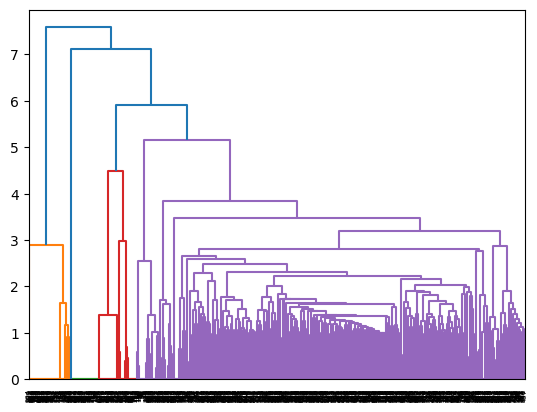

In [219]:
dendrogram(iloh)
plt.show()


In [221]:
clusters=cut_tree(iloh, height=0.8)
for p in range(len(ilos)):
    if len(ilos[p])>3:
        ilos[p][3]= int(clusters[p])
    else:
        ilos[p].append(int(clusters[p]))

In [222]:
ofh = open('moduleilos.txt','w')
print('Ref','Module','ILO', 'Cluster',file=ofh, sep='\t')
for i in ilos:
    i[2]=i[2].replace('\u2010','')
    print('\t'.join([f'{x}'.replace('\t',' ') for x in i]), file=ofh )
ofh.close()

In [223]:
groupedterms ={}
for x in ilos:
    if not groupedterms.get(x[3]):
        groupedterms[x[3]]=[]
    groupedterms[x[3]].append(x)
    


In [224]:
len(groupedterms)

429

In [225]:
len(ilos)

922